In [1]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# ─── Configuration ─────────────────────────────────────────────────────────
base_path   = "DS"
subjects    = range(1, 2)   # just subject 1 for now
runs        = range(1, 11)
eeg_labels  = [
    "F3","F1","Fz","F2","F4","FFC5h","FFC3h","FFC1h","FFC2h","FFC4h","FFC6h",
    "FC5","FC3","FC1","FCz","FC2","FC4","FC6","FTT7h","FCC5h","FCC3h","FCC6h",
    "FTT8h","C5","C3","C1","Cz","C2","C4","C6","TTP7h",
    "CCP5h","CCP3h","CCP1h","CCP2h","CCP4h","CCP6h","TTP8h","CP5","CP3","CP1",
    "CPz","CPP5h","CPP3h","CPP1h","CPP2h","CPP4h","CPP6h","P3","P1","Pz","P2","P4","PPO1h",
    "PPO2h"
]
# only interested in classes 5 (hand close) and 6 (hand open)
event_codes = [1, 2, 5]
# remap 5→0, 6→1
label_map   = {1:0, 2:1, 5:2}

# ─── 1) Load & epoch all runs ───────────────────────────────────────────────
X_list, y_list = [], []
for subj in subjects:
    for run in runs:
        fp = f"{base_path}/S{subj}_MI/motorimagination_subject{subj}_run{run}.gdf"
        raw = mne.io.read_raw_gdf(fp, preload=True, verbose=False)

        # pick only your EEG channels
        to_keep = [ch for ch in eeg_labels if ch in raw.ch_names]
        raw.pick_channels(to_keep)
        raw.filter(0.5, 50.0, verbose=False)

        # extract events & make epochs for codes 5 & 6
        events, _ = mne.events_from_annotations(raw)
        epochs = mne.Epochs(
            raw, events, event_codes,
            tmin=-1.5, tmax=1.0,
            baseline=(None, 0.0),
            preload=True, verbose=False
        )

        data   = epochs.get_data()           # (n_epochs, n_ch, n_times)
        labels = epochs.events[:, 2].astype(int)  # original codes in {5,6}

        # drop any epoch containing NaNs
        mask = ~np.isnan(data).any(axis=(1, 2))
        valid_data   = data[mask]
        valid_labels = labels[mask]

        # remap to 1,2,5->0,1,2
        valid_labels = np.array([label_map[c] for c in valid_labels], dtype=int)

        X_list.append(valid_data)
        y_list.append(valid_labels)

# concatenate
X = np.concatenate(X_list, axis=0)  # (n_epochs, n_channels, n_times)
y = np.concatenate(y_list, axis=0)  # (n_epochs,)

print("Final data shape:", X.shape)
print("Mapped labels:", np.unique(y), np.bincount(y))


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']
Final data shape: (162, 55, 1281)
Mapped labels: [0 1 2] [54 55 53]


In [2]:
print("Shape of all events (1-2):")
# Check the shape of each event
for i in range(0, 2):
    print(f"Event {i}: {X[y == i].shape}")

Shape of all events (1-2):
Event 0: (54, 55, 1281)
Event 1: (55, 55, 1281)


In [3]:
for i in range(0, 2):
    print(f"Event {i}: {np.isnan(X[y == i]).sum()}")

print("Any all-NaN channels left? ",
      np.any(np.all(np.isnan(X), axis=2)))
print("Any all-zero channels left? ",
      np.any(np.all(X == 0,      axis=2)))
print("Any NaNs at all? ", np.isnan(X).any())
print("Any zeros at all? ", np.any(X == 0))

Event 0: 0
Event 1: 0
Any all-NaN channels left?  False
Any all-zero channels left?  False
Any NaNs at all?  False
Any zeros at all?  False


Windowed X shape: (103518, 5, 55)
Windowed y shape: (103518,)
Before casting:
  X_train dtype: float32 X_test dtype: float32
  y_train dtype: int32 y_test dtype: int32
After casting:
  X_train dtype: float32 X_test dtype: float32
  y_train dtype: int32 y_test dtype: int32
Epoch 1/100


C:\Users\ik111\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1941/1941 - 11s - 6ms/step - accuracy: 0.3593 - loss: 1.1128 - val_accuracy: 0.3838 - val_loss: 1.0894
Epoch 2/100
1941/1941 - 8s - 4ms/step - accuracy: 0.3858 - loss: 1.0861 - val_accuracy: 0.4037 - val_loss: 1.0763
Epoch 3/100
1941/1941 - 9s - 4ms/step - accuracy: 0.4124 - loss: 1.0714 - val_accuracy: 0.4311 - val_loss: 1.0595
Epoch 4/100
1941/1941 - 8s - 4ms/step - accuracy: 0.4383 - loss: 1.0512 - val_accuracy: 0.4407 - val_loss: 1.0487
Epoch 5/100
1941/1941 - 9s - 5ms/step - accuracy: 0.4539 - loss: 1.0334 - val_accuracy: 0.4526 - val_loss: 1.0335
Epoch 6/100
1941/1941 - 8s - 4ms/step - accuracy: 0.4757 - loss: 1.0107 - val_accuracy: 0.4801 - val_loss: 1.0097
Epoch 7/100
1941/1941 - 8s - 4ms/step - accuracy: 0.4926 - loss: 0.9902 - val_accuracy: 0.4842 - val_loss: 1.0029
Epoch 8/100
1941/1941 - 8s - 4ms/step - accuracy: 0.5060 - loss: 0.9725 - val_accuracy: 0.4988 - val_loss: 0.9838
Epoch 9/100
1941/1941 - 8s - 4ms/step - accuracy: 0.5185 - loss: 0.9572 - val_accuracy: 0.5027 - va

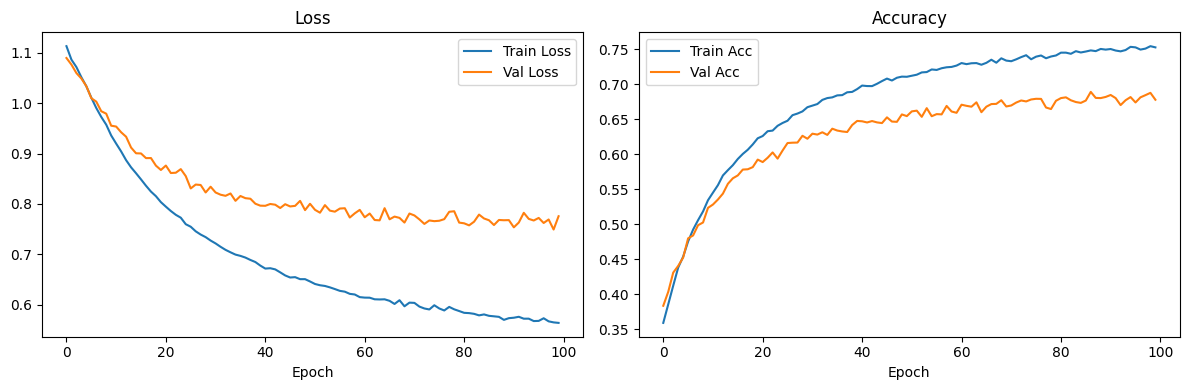

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1) Prepare sequence data for LSTM
# LSTM expects (samples, timesteps, features)
# we have (epochs, channels, times) → swap to (epochs, times, channels)
X_seq = np.transpose(X, (0, 2, 1)).astype('float32')
# Adjust labels to be in the range [0, n_classes-1] and ensure a 1D array
y_seq = (y.astype('int32').squeeze())  # ensure integer dtype, 1D array, and adjust range

# ─── Before your train/test split ────────────────────────────────────────────

def sliding_windows(X, y, window_size, step=None):
    if step is None:
        step = window_size // 2
    Xw, yw = [], []
    n_epochs, n_times, n_ch = X.shape
    for i in range(n_epochs):
        for start in range(0, n_times - window_size + 1, step):
            Xw.append(X[i, start:start+window_size, :])
            yw.append(y[i])
    return np.array(Xw, dtype='float32'), np.array(yw, dtype='int32')

# ─── Example usage ───────────────────────────────────────────────────────────
window_size = 5   #->window size
step        = 2  #->  overlap

X_windows, y_windows = sliding_windows(X_seq, y_seq, window_size, step)

print("Windowed X shape:", X_windows.shape)  # (n_windows, 10, n_channels)
print("Windowed y shape:", y_windows.shape)  # (n_windows,)


# Now split *these* windows into train/val/test instead of the full‐epoch data
X_tr, X_temp, y_tr, y_temp = train_test_split(
    X_windows, y_windows,
    test_size=0.4,
    random_state=42,
    stratify=y_windows
)
X_val, X_te, y_val, y_te = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

# 1) Debug print
print("Before casting:")
print("  X_train dtype:", X_tr.dtype, "X_test dtype:",  X_te.dtype)
print("  y_train dtype:", y_tr.dtype, "y_test dtype:",  y_te.dtype)

# 2) Force numeric types
X_train = X_tr.astype('float32')
X_test  = X_te.astype('float32')
y_train = y_tr.astype('int32')
y_test  = y_te.astype('int32')

print("After casting:")
print("  X_train dtype:", X_train.dtype, "X_test dtype:",  X_test.dtype)
print("  y_train dtype:", y_train.dtype, "y_test dtype:",  y_test.dtype)

# 3) Build & compile
model = Sequential([
    LSTM(50, return_sequences=True,
         input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])
model.compile(
    optimizer=Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4) Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100, batch_size=32, verbose=2
)


# 5) Evaluate on held-out test set
test_loss, test_acc = model.evaluate(X_te, y_te, batch_size=32, verbose=0)
print(f"\nTest loss: {test_loss:.4f} | Test accuracy: {test_acc:.2%}")

# 6) Plot learning curves
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],   label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],   label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\ik111\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 5, 100)         │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,103 (402.75 KB)

 Trainable params: 103,103 (402.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1941/1941 - 14s - 7ms/step - accuracy: 0.3748 - loss: 1.0930 - val_accuracy: 0.3913 - val_loss: 1.0828
Epoch 2/100
1941/1941 - 10s - 5ms/step - accuracy: 0.4104 - loss: 1.0718 - val_accuracy: 0.4209 - val_loss: 1.0636
Epoch 3/100
1941/1941 - 9s - 5ms/step - accuracy: 0.4407 - loss: 1.0474 - val_accuracy: 0.4496 - val_loss: 1.0400
Epoch 4/100
1941/1941 - 9s - 5ms/step - accuracy: 0.4712 - loss: 1.0153 - val_accuracy: 0.4738 - val_loss: 1.0201
Epoch 5/100
1941/1941 - 9s - 5ms/step - accuracy: 0.4939 - loss: 0.9859 - val_accuracy: 0.4869 - val_loss: 1.0002
Epoch 6/100
1941/1941 - 9s - 5ms/step - accuracy: 0.5134 - loss: 0.9583 - val_accuracy: 0.5138 - val_loss: 0.9767
Epoch 7/100
1941/1941 - 9s - 5ms/step - accuracy: 0.5337 - loss: 0.9348 - val_accuracy: 0.5241 - val_loss: 0.9538
Epoch 8/100
1941/1941 - 9s - 5ms/step - accuracy: 0.5539 - loss: 0.9062 - val_accuracy: 0.5343 - val_loss: 0.9464
Epoch 9/100
1941/1941 - 9s - 5ms/step - accuracy: 0.5688 - loss: 0.8819 - val_accuracy

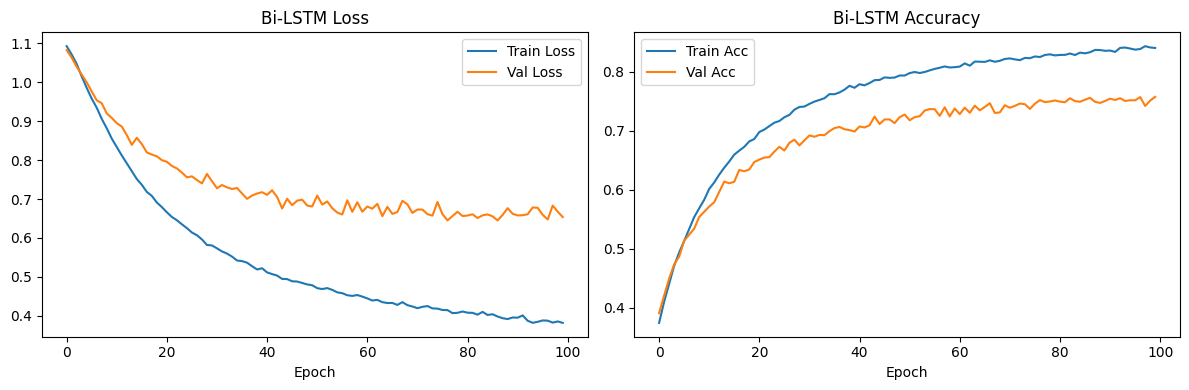

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# ─── Bi-LSTM Model Definition ───────────────────────────────────────────────
n_classes = len(np.unique(y_train))  # number of classes, e.g., 4
timesteps = X_train.shape[1]
n_features = X_train.shape[2]

model_bi = Sequential([
    Bidirectional(LSTM(50, return_sequences=True),
                  input_shape=(timesteps, n_features)),
    Dropout(0.2),
    Bidirectional(LSTM(50)),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

model_bi.compile(
    optimizer=Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_bi.summary()

# ─── Training ────────────────────────────────────────────────────────────────
history_bi = model_bi.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=2
)

# ─── Evaluation ─────────────────────────────────────────────────────────────
test_loss_bi, test_acc_bi = model_bi.evaluate(X_test, y_test, batch_size=32, verbose=0)
print(f"\nBi-LSTM Test Loss: {test_loss_bi:.4f} | Bi-LSTM Test Accuracy: {test_acc_bi:.2%}")

# ─── Plot Learning Curves ───────────────────────────────────────────────────
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_bi.history['loss'],   label='Train Loss')
plt.plot(history_bi.history['val_loss'], label='Val Loss')
plt.title('Bi-LSTM Loss'); plt.xlabel('Epoch'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_bi.history['accuracy'],   label='Train Acc')
plt.plot(history_bi.history['val_accuracy'], label='Val Acc')
plt.title('Bi-LSTM Accuracy'); plt.xlabel('Epoch'); plt.legend()

plt.tight_layout()
plt.show()
